# REGRESSION LOGISTIQUE

- C'est un modèle mathématique utilisé en machine learning pour prédire si quelque chose appartient à une catégorie OUI/NON (binaire).
- Elle analyse les facteurs (âge, tension, cholestérol...).
- Elle applique une fonction spéciale (la sigmoïde) qui transforme les résultats en probabilités (entre 0 et 1).
- Si la probabilité est > 50%, on prédit malade (1).
- Si elle est < 50%, on prédit non malade (0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import shap
import joblib

# Charger les données
df = pd.read_csv('../DATA/donnée_malades_cardiaques.csv', index_col=0)

# Supprimer les colonnes inutiles
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df

ModuleNotFoundError: No module named 'shap'

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Âge                             917 non-null    int64
 1   Sexe                            917 non-null    int64
 2   Tension_aurepos                 917 non-null    int64
 3   Cholestérol                     917 non-null    int64
 4   Glycémieà_jeun                  917 non-null    int64
 5   Fréquence_cardiaque_max         917 non-null    int64
 6   Angine_d_effort                 917 non-null    int64
 7   Dépression_ST                   917 non-null    int64
 8   Maladie_cardiaque               917 non-null    int64
 9   Type_de_douleur_thoracique_ASY  917 non-null    int64
 10  Type_de_douleur_thoracique_ATA  917 non-null    int64
 11  Type_de_douleur_thoracique_NAP  917 non-null    int64
 12  Type_de_douleur_thoracique_TA   917 non-null    int64
 13  ECG_au_rep

In [415]:
display(df.describe())

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,132.540894,243.211559,0.233370,136.789531,0.404580,0.719738,0.552890,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.068702,0.500545,0.430752
std,9.437636,0.407864,17.999749,53.430044,0.423206,25.467129,0.491078,0.990662,0.497466,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.253085,0.500273,0.495452
min,28.000000,0.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,237.000000,0.000000,138.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


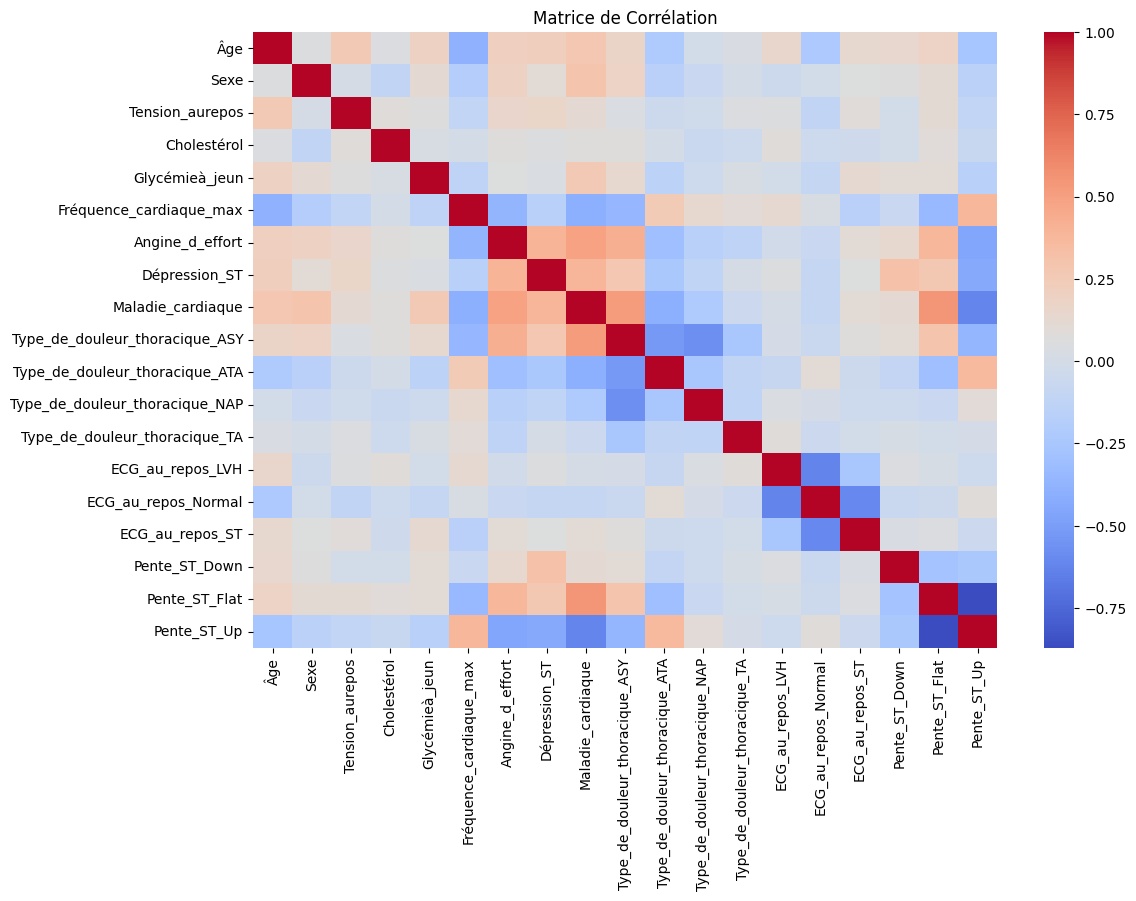

In [416]:
# Vérifier la colinéarité des variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matrice de Corrélation")
plt.show()

#### 🔍 **Observations générales**
- **Rouge foncé (+1)** → Forte corrélation positive (les variables évoluent ensemble).
- **Bleu foncé (-1)** → Forte corrélation négative (les variables évoluent en sens opposé).
- **Blanc (~0)** → Faible corrélation.

#### 📊 **Corrélations importantes**
- **Corrélations positives élevées** :
  - `Tension au repos` ↔ `Cholestérol`  
  - `Fréquence cardiaque max` ↔ `Angine d’effort`
  - `ECG ST` ↔ `Pente ST Up`

- **Corrélations négatives élevées** :
  - `Pente ST Down` ↔ `Fréquence cardiaque max`
  - `ECG Normal` ↔ `Maladie Cardiaque`

#### 🎯 **Impact sur la Maladie Cardiaque**
- **Facteurs clés** : `Type de douleur thoracique`, `ECG au repos`, `Dépression ST`
- **Problème potentiel** : Multicolinéarité entre certaines variables.

In [417]:
X = df.drop(columns=["Maladie_cardiaque"])
Y = df["Maladie_cardiaque"]

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sélection de variables avec Lasso et RFE
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, cv=5)
log_reg.fit(X_train, y_train)

# Meilleur modèle
best_model = log_reg.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Sauvegarde du modèle et du scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'feature_selector.pkl')

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_prob)[:2])

print(f"Meilleur modèle : {log_reg.best_params_}")
print(f"Accuracy : {accuracy:.2f}")
print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print(f"AUC : {roc_auc:.2f}")
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

Meilleur modèle : {'C': 10}
Accuracy : 0.88
Précision : 0.92
Rappel : 0.87
F1-score : 0.89
AUC : 0.92

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



- Accuracy = 88% → 88% des prédictions sont correctes.
- Précision = 92% → 92% des prédictions positives sont correctes.
- Rappel = 87% → Le modèle détecte 87% des cas réellement malades.
- F1-score = 88% → Bon équilibre entre précision et rappel.
- AUC = 0.92 → Excellente capacité à séparer les classes.

Modèle robuste et fiable avec un bon compromis entre précision et rappel

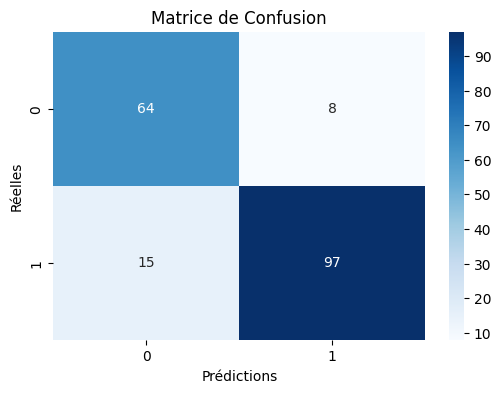

In [418]:
# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Matrice de Confusion")
plt.show()

- Vrais négatifs (TN) = 64 → Prédits comme non malades, réellement non malades.
- Faux positifs (FP) = 8 → Prédits comme malades, mais en réalité non malades.
- Faux négatifs (FN) = 15 → Prédits comme non malades, mais en réalité malades.
- Vrais positifs (TP) = 97 → Prédits comme malades, réellement malades.

**Bonne classification globale, mais :**
- 8 faux positifs → Risque de fausses alertes.
- 15 faux négatifs → Patients malades non détectés (potentiellement plus critique).

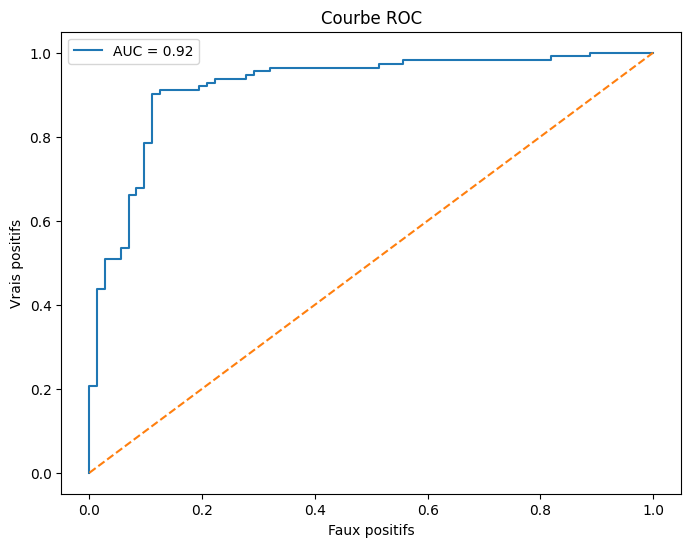

In [419]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

- L’AUC = 0.92 indique une excellente performance du modèle.
- La courbe ROC (bleue) montre une séparation nette entre les classes.
- La diagonale (orange) représente un modèle aléatoire (AUC = 0.5). 
- Modèle très performant : Il distingue bien les malades des non-malades.
- Peu de faux positifs : La courbe est bien éloignée de la diagonale.

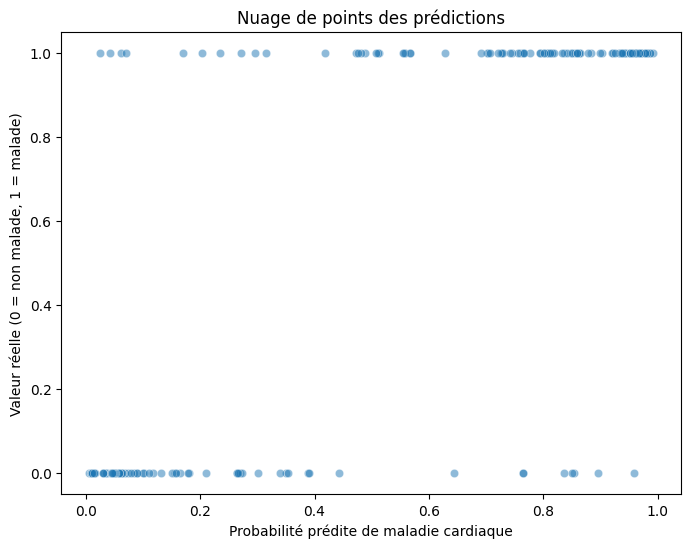

In [420]:
# Nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_prob, y=y_test, alpha=0.5)
plt.xlabel("Probabilité prédite de maladie cardiaque")
plt.ylabel("Valeur réelle (0 = non malade, 1 = malade)")
plt.title("Nuage de points des prédictions")
plt.show()

- Points proches de 0 → Patients prédits comme non malades (classe 0).
- Points proches de 1 → Patients prédits comme malades (classe 1).
- Peu de points proches de 0.5, ce qui montre que le modèle est sûr de ses prédictions.

- Bonne séparation des classes : le modèle distingue bien malades et non-malades.
- Faible ambiguïté : peu de prédictions avec une probabilité proche de 0.5.

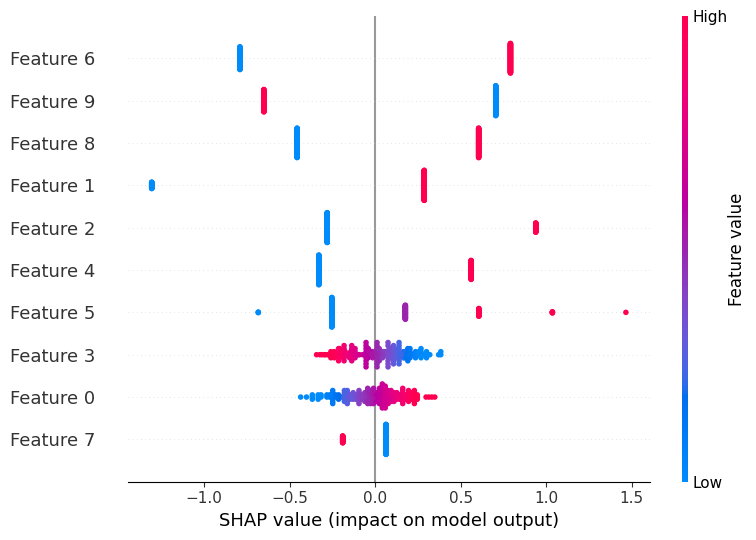

In [421]:
# Interprétation avec SHAP
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

- Couleur :
- 🔴 Rouge → Valeur élevée de la feature.
- 🔵 Bleu → Valeur faible de la feature.
- Axe X : Impact sur la prédiction
- Valeurs positives → Augmentent la probabilité de maladie.
- Valeurs négatives → Réduisent la probabilité de maladie.

- Feature 3 et Feature 5 semblent avoir le plus grand impact sur le modèle.
- Les valeurs élevées de certaines features augmentent fortement le risque de maladie.
- Faible dispersion sur certaines variables, ce qui indique qu'elles influencent peu les prédictions.
- L'interprétation SHAP confirme que certaines variables sont plus déterminantes dans la détection des maladies cardiaques ! 🚀

In [422]:
# Explication des métriques
print(f"- Taux de réussite : {accuracy:.2f}% indique combien de prédictions sont correctes sur l'ensemble de test.")
print(f"- Précision : {precision:.2f}% indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.")

- Taux de réussite : 0.88% indique combien de prédictions sont correctes sur l'ensemble de test.
- Précision : 0.92% indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.


- Taux de réussite : 88% → Le modèle fait 88% de prédictions correctes sur l’ensemble de test.
- Précision : 92% → Lorsqu'il prédit une maladie, 92% des cas sont réellement positifs.
- AUC = 0.92 → Excellente séparation des classes (malades vs non-malades).

In [ ]:
def predire_maladie():
    scaler = joblib.load('scaler.pkl')
    feature_selector = joblib.load('feature_selector.pkl')
    best_model = joblib.load('best_model.pkl')
    
    # Caractéristiques d'un patient test (adapter si nécessaire)
    input_data =  [38,1,138, 175,0,173,0,0,0, 0, 1, 0, 0, 1, 0,  0,  0, 1]
    
    input_array = np.array(input_data).reshape(1, -1)
    
    # Vérifier la correspondance des dimensions
    if input_array.shape[1] != scaler.n_features_in_:
        raise ValueError(f"Le modèle attend {scaler.n_features_in_} caractéristiques, mais {input_array.shape[1]} ont été fournies.")
    
    input_scaled = scaler.transform(input_array)
    input_selected = feature_selector.transform(input_scaled)
    proba_maladie = best_model.predict_proba(input_selected)[:, 1][0]
    prediction = best_model.predict(input_selected)[0]
    
    print(f"\nProbabilité de maladie cardiaque : {proba_maladie * 100:.2f}%")
    print("Résultat :", "Malade" if prediction == 1 else "Non malade")
    return prediction, proba_maladie


# Tester la prédiction
predire_maladie()


Probabilité de maladie cardiaque : 4.76%
Résultat : Non malade


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(np.int64(0), np.float64(0.047617012625797234))